In [90]:
%run 'Load & Clean Rumor'.ipynb

File Name                                             Modified             Size
emergent.csv                                   2019-09-20 11:24:30      1681978
politifact.csv                                 2019-09-20 11:24:30      1745905
snopes.csv                                     2019-09-20 11:24:30      6191626



Rumor Citation Emergent:
Index(['emergent_page', 'claim', 'claim_description', 'claim_label', 'tags',
       'claim_source_domain', 'claim_course_url', 'date', 'body',
       'page_domain', 'page_url', 'page_headline', 'page_position',
       'page_shares', 'page_order'],
      dtype='object')

Rumor Citation Politifact:
Index(['politifact_page', 'claim', 'claim_source', 'claim_citation',
       'claim_label', 'date_published', 'researched_by', 'edited_by', 'tags',
       'page_citation', 'page_url', 'page_is_first_citation'],
      dtype='object')

Rumor Citation Snopes:
Index(['snopes_page', 'topic', 'claim', 'claim_label', 'date_published',
       'date_updated', 'p

In [91]:
rumor_dfs_cleaned = rumor_dfs

rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('emergent_page', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('body', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('claim', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('claim_description', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('claim_course_url', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('date', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('page_url', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('page_headline', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('page_order', axis=1)
rumor_dfs_cleaned[0].claim_label = rumor_dfs_cleaned[0].claim_label.astype('category').cat.codes

rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('politifact_page', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('claim', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('claim_citation', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('date_published', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('page_citation', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('page_url', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('page_is_first_citation', axis=1)
rumor_dfs_cleaned[1].claim_label = rumor_dfs_cleaned[1].claim_label.astype('category').cat.codes

rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('snopes_page', axis=1)
rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('claim', axis=1)
rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('date_published', axis=1)
rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('date_updated', axis=1)
rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('page_url', axis=1)
rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('page_is_first_citation', axis=1)
rumor_dfs_cleaned[2].claim_label = rumor_dfs_cleaned[2].claim_label.astype('category').cat.codes

In [73]:
print(rumor_dfs_cleaned[0].shape, rumor_dfs_cleaned[1].shape, rumor_dfs_cleaned[2].shape)
print(rumor_dfs_cleaned[0].claim_label.value_counts(), rumor_dfs_cleaned[1].claim_label.value_counts(), rumor_dfs_cleaned[2].claim_label.value_counts())

(2144, 5) (2923, 5) (16862, 6)
2    857
1    737
0    550
Name: claim_label, dtype: int64 4    1110
1     731
0     460
2     244
3     207
5     171
Name: claim_label, dtype: int64 0    8765
2    3319
3    2618
5    1480
4     487
6     151
1      42
Name: claim_label, dtype: int64


In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

rumor_one_hots = []

mlb = MultiLabelBinarizer()
rumor_one_hots.append(rumor_dfs_cleaned[0].drop('tags', axis=1).join(p.DataFrame(mlb.fit_transform(rumor_dfs_cleaned[0].tags),
                          columns=mlb.classes_,
                          index=rumor_dfs[0].index)))
rumor_one_hots.append(rumor_dfs_cleaned[1].drop('tags', axis=1).join(p.DataFrame(mlb.fit_transform(rumor_dfs_cleaned[1].tags),
                          columns=mlb.classes_,
                          index=rumor_dfs[1].index)))
rumor_one_hots.append(rumor_dfs_cleaned[2].drop('tags', axis=1).join(p.DataFrame(mlb.fit_transform(rumor_dfs_cleaned[2].tags),
                          columns=mlb.classes_,
                          index=rumor_dfs[2].index)))

In [28]:
rumor_one_hots[0] = p.get_dummies(data=rumor_one_hots[0], columns=['claim_source_domain', 'page_domain'])
rumor_one_hots[1] = p.get_dummies(data=rumor_one_hots[1], columns=['claim_source','researched_by', 'edited_by'])
rumor_one_hots[2] = p.get_dummies(data=rumor_one_hots[2], columns=['topic'])

In [19]:
rumor_one_hots[0].shape, rumor_one_hots[1].shape, rumor_one_hots[2].shape

((2144, 702), (2923, 340), (16862, 3861))

In [20]:
rumor_one_hots[0].page_shares = rumor_one_hots[0].page_shares.str.replace(',', '')
rumor_one_hots[0].page_shares = rumor_one_hots[0].page_shares.astype('int')
rumor_one_hots[0].page_shares -= rumor_one_hots[0].page_shares.min()/rumor_one_hots[0].page_shares.max()

In [21]:
hot_X_train = [] 
hot_X_test = [] 
hot_y_train = [] 
hot_y_test = []

from sklearn.model_selection import train_test_split


for i in range(0,2):
    X_tr, X_te, y_tr, y_te = train_test_split(
         rumor_one_hots[i].drop('claim_label', axis=1), rumor_one_hots[i].claim_label,
        test_size=0.33, random_state=42)

    hot_X_train.append(X_tr)
    hot_X_test.append(X_te)
    hot_y_train.append(y_tr)
    hot_y_test.append(y_te)

In [9]:
from matplotlib import pyplot

def chart_importances(grid, columns):
    importance = grid.best_estimator_.coef_[0]
    for i,v in enumerate(importance):
        if v > 0:
            print('Feature: %0d (%s), Score: %.5f' % (i, columns[i],v))
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

/Users/alexweinstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexweinstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

Emergent:  0.2711864406779661
Feature: 0 (page_shares), Score: 0.00000
Feature: 7 (Airlines), Score: 0.00000
Feature: 10 (Amazon), Score: 0.00000
Feature: 12 (Animals), Score: 0.00000
Feature: 19 (Baby), Score: 0.00000
Feature: 21 (Bill Cosby), Score: 0.00000
Feature: 25 (Boko Haram), Score: 0.00000
Feature: 30 (Brian Williams), Score: 0.00000
Feature: 31 (Bruno Mars), Score: 0.00000
Feature: 37 (Catholic Church), Score: 0.00000
Feature: 39 (Celebrity Deaths), Score: 0.00000
Feature: 47 (Daily Buzz Live), Score: 0.00000
Feature: 49 (Dallas), Score: 0.00000
Feature: 51 (Drugs), Score: 0.00000
Feature: 54 (Ebola), Score: 0.00000
Feature: 57 (Everlast), Score: 0.00000
Feature: 59 (Fake News), Score: 0.00000
Feature: 67 (Fox News), Score: 0.00000
Feature: 68 (Golf), Score: 0.00000
Feature: 70 (Gun Control), Score: 0.00000
Feature: 74 (Harassment), Score: 0.00000
Feature: 75 (Hoaxes), Score: 0.00000
Feature: 76 (Hugh Hefner), Score: 0.00000
Feature: 83 (J.J. Abrams), Score: 0.00000
Feature:

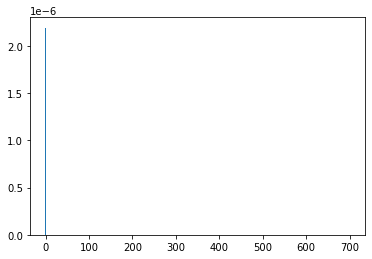

/Users/alexweinstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexweinstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

Politifact:  0.9803108808290155
Feature: 2 ( Climate Change), Score: 0.35431
Feature: 13 ( Economy), Score: 0.20645
Feature: 16 ( Energy), Score: 1.00147
Feature: 17 ( Environment), Score: 1.61813
Feature: 28 ( Guns), Score: 0.81427
Feature: 29 ( Health Care), Score: 1.92928
Feature: 30 ( History), Score: 3.11159
Feature: 31 ( Housing), Score: 1.21388
Feature: 34 ( Immigration), Score: 1.14316
Feature: 35 ( Income), Score: 1.54029
Feature: 37 ( Islam), Score: 0.99284
Feature: 38 ( Israel), Score: 3.82103
Feature: 41 ( Labor), Score: 0.26085
Feature: 42 ( Legal Issues), Score: 2.91168
Feature: 45 ( Medicare), Score: 0.62087
Feature: 51 ( Occupy Wall Street), Score: 0.95636
Feature: 62 ( Religion), Score: 2.05664
Feature: 64 ( Science), Score: 2.53868
Feature: 65 ( Social Security), Score: 1.02571
Feature: 70 ( States), Score: 2.14589
Feature: 71 ( Stimulus), Score: 0.73999
Feature: 73 ( Taxes), Score: 2.37685
Feature: 76 ( Trade), Score: 0.93728
Feature: 84 ( Women), Score: 2.19702
Feat

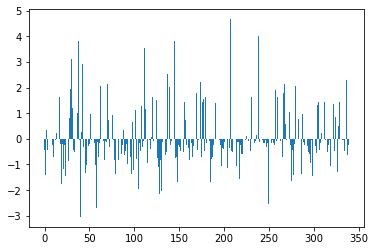

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

lr_grids = []

lr_parameters = {'C':[0.001, 0.01, 0.1, 1, 10]}
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')

cv = KFold(5, shuffle=True)
lr_grids.append(GridSearchCV(lr, param_grid=lr_parameters, cv=cv))
lr_grids.append(GridSearchCV(lr, param_grid=lr_parameters, cv=cv))
lr_grids.append(GridSearchCV(lr, param_grid=lr_parameters, cv=cv))

lr_grids[0].fit(hot_X_train[0], hot_y_train[0])
print("Emergent: ", accuracy_score(lr_grids[0].predict(hot_X_test[0]), hot_y_test[0]))
chart_importances(lr_grids[0], hot_X_train[0].columns)

lr_grids[1].fit(hot_X_train[1], hot_y_train[1])
print("Politifact: ", accuracy_score(lr_grids[1].predict(hot_X_test[1]), hot_y_test[1]))
chart_importances(lr_grids[1], hot_X_train[1].columns)

# too many columns - takes too long
#lr_grids[2].fit(hot_X_train[2], hot_y_train[2])
#print("Snopes: ", accuracy_score(lr_grids[2].predict(hot_X_test[2]), hot_y_test[2]))

In [23]:
def drop_features(grid, df):
    importance = grid.best_estimator_.coef_[0]
    dropped = 0
    for i,v in enumerate(importance):
        if (abs(v) < 0.5):
            df = df.drop(df.columns[i-dropped], axis=1)
            dropped = dropped + 1
    
    return df

In [24]:
#X_train_emerg_drop = drop_features(lr_grids[0], X_train[0])
#X_test_emerg_drop = drop_features(lr_grids[0], X_test[0])

#lr_grids[0].best_estimator_.fit(X_train_emerg_drop, y_train[0])
#print("Emergent: ", accuracy_score(lr_grids[0].best_estimator_.predict(X_test_emerg_drop), 
#                                                       y_test[0]))

X_train_poli_drop = drop_features(lr_grids[1], hot_X_train[1])
X_test_poli_drop = drop_features(lr_grids[1],hot_X_test[1])

lr_grids[1].best_estimator_.fit(X_train_poli_drop, hot_y_train[1])
print("Politifact: ", accuracy_score(lr_grids[1].best_estimator_.predict(X_test_poli_drop), 
                                                       hot_y_test[1]))

Politifact:  0.9202072538860103


/Users/alexweinstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [92]:
for i in range(0,3):
    print(rumor_dfs_cleaned[i].columns)
    rumor_dfs_cleaned[i] = rumor_dfs_cleaned[i].drop('tags', axis=1)
    rumor_dfs_cleaned[i] = rumor_dfs_cleaned[i].astype('category')
    
X_train = [] 
X_test = [] 
y_train = [] 
y_test = []

from sklearn.model_selection import train_test_split

for i in range(0,3):
    X_tr, X_te, y_tr, y_te = train_test_split(
         rumor_dfs_cleaned[i].drop('claim_label', axis=1), rumor_dfs_cleaned[i].claim_label,
        test_size=0.33, random_state=42)

    X_train.append(X_tr)
    X_test.append(X_te)
    y_train.append(y_tr)
    y_test.append(y_te)

Index(['claim_label', 'tags', 'claim_source_domain', 'page_domain',
       'page_shares'],
      dtype='object')
Index(['claim_source', 'claim_label', 'researched_by', 'edited_by', 'tags'], dtype='object')
Index(['topic', 'claim_label', 'page_is_example', 'page_is_image_credit',
       'page_is_archived', 'tags'],
      dtype='object')
['claim_source_domain', 'page_domain', 'page_shares']
['claim_source', 'researched_by', 'edited_by']
['topic', 'page_is_example', 'page_is_image_credit', 'page_is_archived']


In [93]:
from catboost import CatBoostClassifier

classifiers = []

for i in range(0,3):
    classifiers.append(CatBoostClassifier(l2_leaf_reg=8,
                              learning_rate=0.2,
                              depth=1,
                              boosting_type='Plain',
                              one_hot_max_size=255,
                              cat_features=list(X_train[i].columns)))

    classifiers[i].fit(X_train[i], y_train[i])
    print("Score: ", classifiers[i].score(X_test[i], y_test[i]))

0:	learn: 1.0813620	total: 2.19ms	remaining: 2.19s
1:	learn: 1.0640951	total: 42ms	remaining: 20.9s
2:	learn: 1.0531239	total: 44.2ms	remaining: 14.7s
3:	learn: 1.0273511	total: 47.1ms	remaining: 11.7s
4:	learn: 1.0046243	total: 49.7ms	remaining: 9.88s
5:	learn: 0.9858259	total: 57.8ms	remaining: 9.58s
6:	learn: 0.9632293	total: 59.4ms	remaining: 8.42s
7:	learn: 0.9551467	total: 61ms	remaining: 7.57s
8:	learn: 0.9376128	total: 64.1ms	remaining: 7.06s
9:	learn: 0.9202394	total: 65.7ms	remaining: 6.51s
10:	learn: 0.9088879	total: 67.5ms	remaining: 6.07s
11:	learn: 0.9010955	total: 69.1ms	remaining: 5.69s
12:	learn: 0.8946552	total: 71.2ms	remaining: 5.41s
13:	learn: 0.8911027	total: 73ms	remaining: 5.14s
14:	learn: 0.8829201	total: 74.3ms	remaining: 4.88s
15:	learn: 0.8735465	total: 75.4ms	remaining: 4.64s
16:	learn: 0.8685379	total: 76.8ms	remaining: 4.44s
17:	learn: 0.8616803	total: 78.2ms	remaining: 4.27s
18:	learn: 0.8541275	total: 92.2ms	remaining: 4.76s
19:	learn: 0.8494384	total: 

231:	learn: 0.5210256	total: 751ms	remaining: 2.48s
232:	learn: 0.5205373	total: 753ms	remaining: 2.48s
233:	learn: 0.5200306	total: 755ms	remaining: 2.47s
234:	learn: 0.5196310	total: 756ms	remaining: 2.46s
235:	learn: 0.5192262	total: 757ms	remaining: 2.45s
236:	learn: 0.5185126	total: 759ms	remaining: 2.44s
237:	learn: 0.5172724	total: 761ms	remaining: 2.44s
238:	learn: 0.5162698	total: 763ms	remaining: 2.43s
239:	learn: 0.5148694	total: 765ms	remaining: 2.42s
240:	learn: 0.5131683	total: 766ms	remaining: 2.41s
241:	learn: 0.5125309	total: 769ms	remaining: 2.41s
242:	learn: 0.5113760	total: 771ms	remaining: 2.4s
243:	learn: 0.5112515	total: 774ms	remaining: 2.4s
244:	learn: 0.5105677	total: 777ms	remaining: 2.39s
245:	learn: 0.5093736	total: 786ms	remaining: 2.41s
246:	learn: 0.5080324	total: 788ms	remaining: 2.4s
247:	learn: 0.5076350	total: 793ms	remaining: 2.4s
248:	learn: 0.5065640	total: 795ms	remaining: 2.4s
249:	learn: 0.5061428	total: 800ms	remaining: 2.4s
250:	learn: 0.5057

453:	learn: 0.4073660	total: 1.72s	remaining: 2.07s
454:	learn: 0.4070785	total: 1.73s	remaining: 2.07s
455:	learn: 0.4067892	total: 1.73s	remaining: 2.06s
456:	learn: 0.4064801	total: 1.73s	remaining: 2.05s
457:	learn: 0.4062034	total: 1.73s	remaining: 2.05s
458:	learn: 0.4060075	total: 1.73s	remaining: 2.04s
459:	learn: 0.4057888	total: 1.74s	remaining: 2.04s
460:	learn: 0.4055296	total: 1.74s	remaining: 2.04s
461:	learn: 0.4052678	total: 1.75s	remaining: 2.03s
462:	learn: 0.4051318	total: 1.75s	remaining: 2.03s
463:	learn: 0.4050080	total: 1.75s	remaining: 2.02s
464:	learn: 0.4048133	total: 1.76s	remaining: 2.02s
465:	learn: 0.4045366	total: 1.76s	remaining: 2.02s
466:	learn: 0.4043326	total: 1.76s	remaining: 2.01s
467:	learn: 0.4040483	total: 1.76s	remaining: 2s
468:	learn: 0.4037368	total: 1.76s	remaining: 2s
469:	learn: 0.4036256	total: 1.76s	remaining: 1.99s
470:	learn: 0.4033758	total: 1.77s	remaining: 1.99s
471:	learn: 0.4026957	total: 1.77s	remaining: 1.98s
472:	learn: 0.4024

660:	learn: 0.3490183	total: 2.35s	remaining: 1.2s
661:	learn: 0.3487633	total: 2.35s	remaining: 1.2s
662:	learn: 0.3485958	total: 2.36s	remaining: 1.2s
663:	learn: 0.3485152	total: 2.36s	remaining: 1.19s
664:	learn: 0.3483973	total: 2.36s	remaining: 1.19s
665:	learn: 0.3482132	total: 2.36s	remaining: 1.19s
666:	learn: 0.3481207	total: 2.37s	remaining: 1.18s
667:	learn: 0.3472070	total: 2.37s	remaining: 1.18s
668:	learn: 0.3470035	total: 2.37s	remaining: 1.17s
669:	learn: 0.3469157	total: 2.37s	remaining: 1.17s
670:	learn: 0.3468385	total: 2.38s	remaining: 1.17s
671:	learn: 0.3467503	total: 2.38s	remaining: 1.16s
672:	learn: 0.3465632	total: 2.38s	remaining: 1.16s
673:	learn: 0.3464870	total: 2.38s	remaining: 1.15s
674:	learn: 0.3464470	total: 2.38s	remaining: 1.15s
675:	learn: 0.3462223	total: 2.38s	remaining: 1.14s
676:	learn: 0.3460580	total: 2.39s	remaining: 1.14s
677:	learn: 0.3457979	total: 2.39s	remaining: 1.13s
678:	learn: 0.3454741	total: 2.39s	remaining: 1.13s
679:	learn: 0.3

848:	learn: 0.3136039	total: 3.37s	remaining: 599ms
849:	learn: 0.3135376	total: 3.37s	remaining: 595ms
850:	learn: 0.3131352	total: 3.38s	remaining: 593ms
851:	learn: 0.3129697	total: 3.39s	remaining: 589ms
852:	learn: 0.3128815	total: 3.4s	remaining: 585ms
853:	learn: 0.3127184	total: 3.4s	remaining: 581ms
854:	learn: 0.3126399	total: 3.4s	remaining: 577ms
855:	learn: 0.3126010	total: 3.4s	remaining: 573ms
856:	learn: 0.3125044	total: 3.44s	remaining: 573ms
857:	learn: 0.3124741	total: 3.44s	remaining: 569ms
858:	learn: 0.3124165	total: 3.44s	remaining: 565ms
859:	learn: 0.3118394	total: 3.44s	remaining: 561ms
860:	learn: 0.3117613	total: 3.45s	remaining: 557ms
861:	learn: 0.3114518	total: 3.45s	remaining: 552ms
862:	learn: 0.3114225	total: 3.45s	remaining: 548ms
863:	learn: 0.3114039	total: 3.49s	remaining: 549ms
864:	learn: 0.3112610	total: 3.49s	remaining: 545ms
865:	learn: 0.3112000	total: 3.49s	remaining: 540ms
866:	learn: 0.3110703	total: 3.5s	remaining: 536ms
867:	learn: 0.310

28:	learn: 1.4244776	total: 122ms	remaining: 4.08s
29:	learn: 1.4208807	total: 126ms	remaining: 4.06s
30:	learn: 1.4192317	total: 131ms	remaining: 4.09s
31:	learn: 1.4161645	total: 133ms	remaining: 4.03s
32:	learn: 1.4143990	total: 138ms	remaining: 4.05s
33:	learn: 1.4129392	total: 140ms	remaining: 3.98s
34:	learn: 1.4104760	total: 142ms	remaining: 3.91s
35:	learn: 1.4088945	total: 175ms	remaining: 4.7s
36:	learn: 1.4075741	total: 179ms	remaining: 4.66s
37:	learn: 1.4061782	total: 183ms	remaining: 4.64s
38:	learn: 1.4036053	total: 185ms	remaining: 4.56s
39:	learn: 1.4029947	total: 187ms	remaining: 4.48s
40:	learn: 1.4000852	total: 188ms	remaining: 4.41s
41:	learn: 1.3985742	total: 190ms	remaining: 4.33s
42:	learn: 1.3967428	total: 192ms	remaining: 4.27s
43:	learn: 1.3955054	total: 197ms	remaining: 4.29s
44:	learn: 1.3943789	total: 199ms	remaining: 4.22s
45:	learn: 1.3903406	total: 200ms	remaining: 4.15s
46:	learn: 1.3887639	total: 202ms	remaining: 4.1s
47:	learn: 1.3875922	total: 204ms

210:	learn: 1.2101527	total: 879ms	remaining: 3.29s
211:	learn: 1.2095349	total: 889ms	remaining: 3.3s
212:	learn: 1.2091049	total: 892ms	remaining: 3.29s
213:	learn: 1.2087298	total: 894ms	remaining: 3.29s
214:	learn: 1.2078612	total: 897ms	remaining: 3.27s
215:	learn: 1.2073080	total: 898ms	remaining: 3.26s
216:	learn: 1.2068792	total: 901ms	remaining: 3.25s
217:	learn: 1.2065340	total: 903ms	remaining: 3.24s
218:	learn: 1.2059379	total: 906ms	remaining: 3.23s
219:	learn: 1.2055925	total: 908ms	remaining: 3.22s
220:	learn: 1.2049954	total: 910ms	remaining: 3.21s
221:	learn: 1.2045598	total: 912ms	remaining: 3.19s
222:	learn: 1.2038435	total: 916ms	remaining: 3.19s
223:	learn: 1.2033796	total: 918ms	remaining: 3.18s
224:	learn: 1.2028896	total: 920ms	remaining: 3.17s
225:	learn: 1.2024630	total: 922ms	remaining: 3.16s
226:	learn: 1.2020501	total: 924ms	remaining: 3.15s
227:	learn: 1.2015223	total: 926ms	remaining: 3.13s
228:	learn: 1.2009933	total: 928ms	remaining: 3.12s
229:	learn: 1

386:	learn: 1.1151214	total: 1.49s	remaining: 2.36s
387:	learn: 1.1148185	total: 1.49s	remaining: 2.35s
388:	learn: 1.1144381	total: 1.49s	remaining: 2.35s
389:	learn: 1.1141490	total: 1.5s	remaining: 2.34s
390:	learn: 1.1136891	total: 1.5s	remaining: 2.34s
391:	learn: 1.1131280	total: 1.5s	remaining: 2.33s
392:	learn: 1.1120266	total: 1.51s	remaining: 2.33s
393:	learn: 1.1115619	total: 1.51s	remaining: 2.33s
394:	learn: 1.1103910	total: 1.53s	remaining: 2.34s
395:	learn: 1.1093672	total: 1.53s	remaining: 2.33s
396:	learn: 1.1089257	total: 1.53s	remaining: 2.33s
397:	learn: 1.1085517	total: 1.53s	remaining: 2.32s
398:	learn: 1.1079565	total: 1.54s	remaining: 2.32s
399:	learn: 1.1076479	total: 1.54s	remaining: 2.31s
400:	learn: 1.1073821	total: 1.54s	remaining: 2.3s
401:	learn: 1.1071112	total: 1.54s	remaining: 2.3s
402:	learn: 1.1067605	total: 1.55s	remaining: 2.29s
403:	learn: 1.1065157	total: 1.55s	remaining: 2.29s
404:	learn: 1.1061015	total: 1.55s	remaining: 2.28s
405:	learn: 1.105

574:	learn: 1.0449114	total: 2.09s	remaining: 1.54s
575:	learn: 1.0448025	total: 2.09s	remaining: 1.54s
576:	learn: 1.0445296	total: 2.09s	remaining: 1.53s
577:	learn: 1.0439829	total: 2.1s	remaining: 1.53s
578:	learn: 1.0427425	total: 2.1s	remaining: 1.53s
579:	learn: 1.0426394	total: 2.11s	remaining: 1.52s
580:	learn: 1.0415409	total: 2.11s	remaining: 1.52s
581:	learn: 1.0411998	total: 2.12s	remaining: 1.52s
582:	learn: 1.0408752	total: 2.12s	remaining: 1.51s
583:	learn: 1.0403825	total: 2.12s	remaining: 1.51s
584:	learn: 1.0398199	total: 2.12s	remaining: 1.5s
585:	learn: 1.0396215	total: 2.12s	remaining: 1.5s
586:	learn: 1.0391769	total: 2.13s	remaining: 1.5s
587:	learn: 1.0390631	total: 2.13s	remaining: 1.49s
588:	learn: 1.0383592	total: 2.13s	remaining: 1.49s
589:	learn: 1.0380231	total: 2.13s	remaining: 1.48s
590:	learn: 1.0375241	total: 2.13s	remaining: 1.48s
591:	learn: 1.0373025	total: 2.13s	remaining: 1.47s
592:	learn: 1.0370753	total: 2.14s	remaining: 1.47s
593:	learn: 1.036

739:	learn: 0.9935506	total: 2.44s	remaining: 858ms
740:	learn: 0.9933949	total: 2.48s	remaining: 868ms
741:	learn: 0.9933219	total: 2.49s	remaining: 867ms
742:	learn: 0.9932000	total: 2.5s	remaining: 863ms
743:	learn: 0.9930402	total: 2.5s	remaining: 860ms
744:	learn: 0.9927932	total: 2.5s	remaining: 857ms
745:	learn: 0.9925896	total: 2.54s	remaining: 866ms
746:	learn: 0.9921581	total: 2.58s	remaining: 874ms
747:	learn: 0.9918399	total: 2.59s	remaining: 872ms
748:	learn: 0.9916862	total: 2.59s	remaining: 869ms
749:	learn: 0.9914794	total: 2.62s	remaining: 873ms
750:	learn: 0.9912905	total: 2.68s	remaining: 888ms
751:	learn: 0.9909027	total: 2.71s	remaining: 895ms
752:	learn: 0.9904932	total: 2.72s	remaining: 893ms
753:	learn: 0.9904225	total: 2.73s	remaining: 891ms
754:	learn: 0.9901677	total: 2.73s	remaining: 888ms
755:	learn: 0.9899784	total: 2.77s	remaining: 894ms
756:	learn: 0.9891656	total: 2.77s	remaining: 890ms
757:	learn: 0.9890659	total: 2.78s	remaining: 887ms
758:	learn: 0.9

902:	learn: 0.9531727	total: 3.26s	remaining: 350ms
903:	learn: 0.9523132	total: 3.26s	remaining: 347ms
904:	learn: 0.9517744	total: 3.28s	remaining: 345ms
905:	learn: 0.9517093	total: 3.29s	remaining: 341ms
906:	learn: 0.9515836	total: 3.31s	remaining: 339ms
907:	learn: 0.9513476	total: 3.31s	remaining: 335ms
908:	learn: 0.9512547	total: 3.31s	remaining: 331ms
909:	learn: 0.9507952	total: 3.31s	remaining: 328ms
910:	learn: 0.9503375	total: 3.31s	remaining: 324ms
911:	learn: 0.9502494	total: 3.32s	remaining: 320ms
912:	learn: 0.9501498	total: 3.34s	remaining: 318ms
913:	learn: 0.9499045	total: 3.34s	remaining: 315ms
914:	learn: 0.9497709	total: 3.35s	remaining: 311ms
915:	learn: 0.9496166	total: 3.35s	remaining: 307ms
916:	learn: 0.9494683	total: 3.35s	remaining: 303ms
917:	learn: 0.9493836	total: 3.35s	remaining: 299ms
918:	learn: 0.9490497	total: 3.35s	remaining: 296ms
919:	learn: 0.9487943	total: 3.35s	remaining: 292ms
920:	learn: 0.9487083	total: 3.36s	remaining: 288ms
921:	learn: 

70:	learn: 1.2129714	total: 898ms	remaining: 11.7s
71:	learn: 1.2126180	total: 933ms	remaining: 12s
72:	learn: 1.2123535	total: 944ms	remaining: 12s
73:	learn: 1.2120763	total: 964ms	remaining: 12.1s
74:	learn: 1.2117761	total: 974ms	remaining: 12s
75:	learn: 1.2113743	total: 983ms	remaining: 11.9s
76:	learn: 1.2102551	total: 1.01s	remaining: 12.1s
77:	learn: 1.2099050	total: 1.02s	remaining: 12.1s
78:	learn: 1.2096875	total: 1.03s	remaining: 12s
79:	learn: 1.2093761	total: 1.04s	remaining: 12s
80:	learn: 1.2089116	total: 1.05s	remaining: 11.9s
81:	learn: 1.2088227	total: 1.05s	remaining: 11.8s
82:	learn: 1.2086808	total: 1.06s	remaining: 11.7s
83:	learn: 1.2083923	total: 1.07s	remaining: 11.7s
84:	learn: 1.2083119	total: 1.08s	remaining: 11.6s
85:	learn: 1.2081106	total: 1.09s	remaining: 11.6s
86:	learn: 1.2078400	total: 1.1s	remaining: 11.5s
87:	learn: 1.2076161	total: 1.11s	remaining: 11.5s
88:	learn: 1.2075437	total: 1.11s	remaining: 11.4s
89:	learn: 1.2073159	total: 1.12s	remainin

229:	learn: 1.1888326	total: 3.16s	remaining: 10.6s
230:	learn: 1.1887603	total: 3.18s	remaining: 10.6s
231:	learn: 1.1887147	total: 3.19s	remaining: 10.6s
232:	learn: 1.1886789	total: 3.2s	remaining: 10.5s
233:	learn: 1.1886271	total: 3.21s	remaining: 10.5s
234:	learn: 1.1885932	total: 3.22s	remaining: 10.5s
235:	learn: 1.1884612	total: 3.22s	remaining: 10.4s
236:	learn: 1.1884427	total: 3.23s	remaining: 10.4s
237:	learn: 1.1884070	total: 3.24s	remaining: 10.4s
238:	learn: 1.1883347	total: 3.25s	remaining: 10.3s
239:	learn: 1.1883175	total: 3.25s	remaining: 10.3s
240:	learn: 1.1882894	total: 3.26s	remaining: 10.3s
241:	learn: 1.1882097	total: 3.27s	remaining: 10.2s
242:	learn: 1.1881183	total: 3.28s	remaining: 10.2s
243:	learn: 1.1880943	total: 3.29s	remaining: 10.2s
244:	learn: 1.1876383	total: 3.29s	remaining: 10.2s
245:	learn: 1.1875511	total: 3.31s	remaining: 10.1s
246:	learn: 1.1874924	total: 3.31s	remaining: 10.1s
247:	learn: 1.1874291	total: 3.32s	remaining: 10.1s
248:	learn: 1

393:	learn: 1.1808878	total: 5.09s	remaining: 7.83s
394:	learn: 1.1808641	total: 5.1s	remaining: 7.81s
395:	learn: 1.1808435	total: 5.12s	remaining: 7.8s
396:	learn: 1.1808147	total: 5.18s	remaining: 7.86s
397:	learn: 1.1808124	total: 5.21s	remaining: 7.87s
398:	learn: 1.1808072	total: 5.21s	remaining: 7.85s
399:	learn: 1.1807642	total: 5.22s	remaining: 7.83s
400:	learn: 1.1807306	total: 5.27s	remaining: 7.87s
401:	learn: 1.1807120	total: 5.29s	remaining: 7.87s
402:	learn: 1.1807052	total: 5.3s	remaining: 7.85s
403:	learn: 1.1806845	total: 5.33s	remaining: 7.86s
404:	learn: 1.1806419	total: 5.34s	remaining: 7.84s
405:	learn: 1.1806318	total: 5.35s	remaining: 7.82s
406:	learn: 1.1805892	total: 5.37s	remaining: 7.82s
407:	learn: 1.1805718	total: 5.38s	remaining: 7.81s
408:	learn: 1.1804882	total: 5.39s	remaining: 7.79s
409:	learn: 1.1804607	total: 5.42s	remaining: 7.79s
410:	learn: 1.1804480	total: 5.43s	remaining: 7.78s
411:	learn: 1.1804226	total: 5.43s	remaining: 7.76s
412:	learn: 1.1

554:	learn: 1.1771950	total: 7.2s	remaining: 5.77s
555:	learn: 1.1771887	total: 7.22s	remaining: 5.76s
556:	learn: 1.1771572	total: 7.23s	remaining: 5.75s
557:	learn: 1.1771412	total: 7.24s	remaining: 5.74s
558:	learn: 1.1770898	total: 7.25s	remaining: 5.72s
559:	learn: 1.1770800	total: 7.26s	remaining: 5.71s
560:	learn: 1.1770778	total: 7.27s	remaining: 5.69s
561:	learn: 1.1770702	total: 7.28s	remaining: 5.67s
562:	learn: 1.1770448	total: 7.29s	remaining: 5.66s
563:	learn: 1.1770269	total: 7.3s	remaining: 5.64s
564:	learn: 1.1770071	total: 7.31s	remaining: 5.63s
565:	learn: 1.1769968	total: 7.33s	remaining: 5.62s
566:	learn: 1.1769800	total: 7.34s	remaining: 5.6s
567:	learn: 1.1769675	total: 7.35s	remaining: 5.59s
568:	learn: 1.1769597	total: 7.36s	remaining: 5.58s
569:	learn: 1.1769530	total: 7.37s	remaining: 5.56s
570:	learn: 1.1769073	total: 7.38s	remaining: 5.54s
571:	learn: 1.1769012	total: 7.39s	remaining: 5.53s
572:	learn: 1.1768939	total: 7.4s	remaining: 5.51s
573:	learn: 1.17

721:	learn: 1.1751233	total: 9.58s	remaining: 3.69s
722:	learn: 1.1751155	total: 9.6s	remaining: 3.68s
723:	learn: 1.1751066	total: 9.63s	remaining: 3.67s
724:	learn: 1.1750999	total: 9.64s	remaining: 3.66s
725:	learn: 1.1750955	total: 9.65s	remaining: 3.64s
726:	learn: 1.1750912	total: 9.68s	remaining: 3.63s
727:	learn: 1.1750832	total: 9.69s	remaining: 3.62s
728:	learn: 1.1750807	total: 9.7s	remaining: 3.6s
729:	learn: 1.1750726	total: 9.71s	remaining: 3.59s
730:	learn: 1.1750678	total: 9.72s	remaining: 3.58s
731:	learn: 1.1750651	total: 9.73s	remaining: 3.56s
732:	learn: 1.1750561	total: 9.74s	remaining: 3.55s
733:	learn: 1.1750458	total: 9.76s	remaining: 3.54s
734:	learn: 1.1750021	total: 9.76s	remaining: 3.52s
735:	learn: 1.1749674	total: 9.77s	remaining: 3.51s
736:	learn: 1.1749635	total: 9.78s	remaining: 3.49s
737:	learn: 1.1749562	total: 9.79s	remaining: 3.48s
738:	learn: 1.1749439	total: 9.8s	remaining: 3.46s
739:	learn: 1.1749405	total: 9.81s	remaining: 3.45s
740:	learn: 1.17

884:	learn: 1.1735253	total: 12.6s	remaining: 1.63s
885:	learn: 1.1735200	total: 12.6s	remaining: 1.62s
886:	learn: 1.1735091	total: 12.6s	remaining: 1.6s
887:	learn: 1.1735053	total: 12.6s	remaining: 1.59s
888:	learn: 1.1735039	total: 12.6s	remaining: 1.57s
889:	learn: 1.1734981	total: 12.6s	remaining: 1.56s
890:	learn: 1.1734977	total: 12.6s	remaining: 1.54s
891:	learn: 1.1734964	total: 12.6s	remaining: 1.53s
892:	learn: 1.1734920	total: 12.6s	remaining: 1.51s
893:	learn: 1.1734909	total: 12.6s	remaining: 1.5s
894:	learn: 1.1734856	total: 12.7s	remaining: 1.48s
895:	learn: 1.1734819	total: 12.7s	remaining: 1.47s
896:	learn: 1.1734696	total: 12.7s	remaining: 1.46s
897:	learn: 1.1734686	total: 12.7s	remaining: 1.44s
898:	learn: 1.1734627	total: 12.7s	remaining: 1.43s
899:	learn: 1.1734546	total: 12.7s	remaining: 1.41s
900:	learn: 1.1734501	total: 12.7s	remaining: 1.4s
901:	learn: 1.1734456	total: 12.7s	remaining: 1.38s
902:	learn: 1.1734236	total: 12.7s	remaining: 1.37s
903:	learn: 1.1

In [76]:
from catboost import EFstrType

for i in range(0,3):
    print(classifiers[i].get_feature_importance(data=None, type=EFstrType.FeatureImportance, prettified=True))

            Feature Id  Importances
0  claim_source_domain    56.460307
1          page_shares    34.133728
2          page_domain     9.405965
      Feature Id  Importances
0  researched_by    41.679858
1   claim_source    32.703790
2      edited_by    25.616352
             Feature Id  Importances
0                 topic    95.177453
1      page_is_archived     2.124356
2       page_is_example     1.637024
3  page_is_image_credit     1.061167


In [57]:
from catboost import CatBoostClassifier

classifiers = []

for i in range(0,3):
    classifiers.append(CatBoostClassifier(l2_leaf_reg=8,
                              learning_rate=0.2,
                              depth=1,
                              boosting_type='Plain',
                              one_hot_max_size=255,
                              cat_features=list(X_train[i].columns)))

    classifiers[i].fit(X_train[i], y_train[i])
    print("Score: ", classifiers[i].score(X_test[i], y_test[i]))

0:	learn: 1.0621994	total: 2.93ms	remaining: 2.93s
1:	learn: 1.0350423	total: 4.27ms	remaining: 2.13s
2:	learn: 1.0160455	total: 5.75ms	remaining: 1.91s
3:	learn: 0.9950159	total: 7.21ms	remaining: 1.79s
4:	learn: 0.9753494	total: 8.46ms	remaining: 1.68s
5:	learn: 0.9640281	total: 9.46ms	remaining: 1.57s
6:	learn: 0.9518288	total: 10.4ms	remaining: 1.48s
7:	learn: 0.9418728	total: 12.1ms	remaining: 1.5s
8:	learn: 0.9321221	total: 13.3ms	remaining: 1.47s
9:	learn: 0.9242531	total: 14.3ms	remaining: 1.41s
10:	learn: 0.9137417	total: 15.3ms	remaining: 1.37s
11:	learn: 0.9051862	total: 16.3ms	remaining: 1.34s
12:	learn: 0.8981083	total: 17.2ms	remaining: 1.3s
13:	learn: 0.8937639	total: 18.1ms	remaining: 1.27s
14:	learn: 0.8876739	total: 19.1ms	remaining: 1.26s
15:	learn: 0.8814601	total: 20.1ms	remaining: 1.24s
16:	learn: 0.8739090	total: 21.2ms	remaining: 1.22s
17:	learn: 0.8684460	total: 25ms	remaining: 1.36s
18:	learn: 0.8632768	total: 26ms	remaining: 1.34s
19:	learn: 0.8590233	total: 

260:	learn: 0.5074660	total: 367ms	remaining: 1.04s
261:	learn: 0.5063794	total: 368ms	remaining: 1.04s
262:	learn: 0.5060841	total: 369ms	remaining: 1.03s
263:	learn: 0.5056837	total: 371ms	remaining: 1.03s
264:	learn: 0.5044454	total: 372ms	remaining: 1.03s
265:	learn: 0.5030519	total: 374ms	remaining: 1.03s
266:	learn: 0.5022320	total: 375ms	remaining: 1.03s
267:	learn: 0.5015224	total: 376ms	remaining: 1.03s
268:	learn: 0.5012466	total: 378ms	remaining: 1.03s
269:	learn: 0.5009669	total: 379ms	remaining: 1.02s
270:	learn: 0.5005455	total: 381ms	remaining: 1.02s
271:	learn: 0.5001625	total: 382ms	remaining: 1.02s
272:	learn: 0.4998039	total: 384ms	remaining: 1.02s
273:	learn: 0.4983241	total: 385ms	remaining: 1.02s
274:	learn: 0.4973761	total: 386ms	remaining: 1.02s
275:	learn: 0.4955968	total: 388ms	remaining: 1.02s
276:	learn: 0.4955305	total: 395ms	remaining: 1.03s
277:	learn: 0.4951307	total: 397ms	remaining: 1.03s
278:	learn: 0.4948954	total: 398ms	remaining: 1.03s
279:	learn: 

526:	learn: 0.3954751	total: 732ms	remaining: 657ms
527:	learn: 0.3954173	total: 734ms	remaining: 656ms
528:	learn: 0.3953110	total: 735ms	remaining: 654ms
529:	learn: 0.3950532	total: 737ms	remaining: 653ms
530:	learn: 0.3947007	total: 739ms	remaining: 652ms
531:	learn: 0.3945164	total: 740ms	remaining: 651ms
532:	learn: 0.3944595	total: 742ms	remaining: 650ms
533:	learn: 0.3944044	total: 744ms	remaining: 649ms
534:	learn: 0.3941314	total: 745ms	remaining: 648ms
535:	learn: 0.3940050	total: 747ms	remaining: 646ms
536:	learn: 0.3937799	total: 748ms	remaining: 645ms
537:	learn: 0.3936068	total: 749ms	remaining: 643ms
538:	learn: 0.3933934	total: 750ms	remaining: 642ms
539:	learn: 0.3933019	total: 752ms	remaining: 641ms
540:	learn: 0.3930159	total: 753ms	remaining: 639ms
541:	learn: 0.3928282	total: 755ms	remaining: 638ms
542:	learn: 0.3927011	total: 764ms	remaining: 643ms
543:	learn: 0.3926500	total: 766ms	remaining: 642ms
544:	learn: 0.3924549	total: 768ms	remaining: 641ms
545:	learn: 

740:	learn: 0.3405613	total: 1.06s	remaining: 371ms
741:	learn: 0.3404034	total: 1.06s	remaining: 371ms
742:	learn: 0.3402557	total: 1.07s	remaining: 369ms
743:	learn: 0.3400036	total: 1.07s	remaining: 368ms
744:	learn: 0.3399583	total: 1.07s	remaining: 367ms
745:	learn: 0.3398847	total: 1.07s	remaining: 365ms
746:	learn: 0.3398426	total: 1.07s	remaining: 364ms
747:	learn: 0.3397708	total: 1.07s	remaining: 362ms
748:	learn: 0.3397183	total: 1.08s	remaining: 361ms
749:	learn: 0.3395181	total: 1.08s	remaining: 359ms
750:	learn: 0.3393268	total: 1.08s	remaining: 358ms
751:	learn: 0.3392277	total: 1.08s	remaining: 357ms
752:	learn: 0.3390995	total: 1.08s	remaining: 355ms
753:	learn: 0.3388702	total: 1.08s	remaining: 354ms
754:	learn: 0.3386225	total: 1.09s	remaining: 353ms
755:	learn: 0.3384446	total: 1.09s	remaining: 351ms
756:	learn: 0.3382801	total: 1.09s	remaining: 350ms
757:	learn: 0.3382106	total: 1.09s	remaining: 348ms
758:	learn: 0.3380393	total: 1.09s	remaining: 346ms
759:	learn: 

985:	learn: 0.2983124	total: 1.43s	remaining: 20.3ms
986:	learn: 0.2981364	total: 1.43s	remaining: 18.8ms
987:	learn: 0.2980000	total: 1.43s	remaining: 17.4ms
988:	learn: 0.2977878	total: 1.43s	remaining: 15.9ms
989:	learn: 0.2976872	total: 1.43s	remaining: 14.5ms
990:	learn: 0.2972546	total: 1.44s	remaining: 13ms
991:	learn: 0.2968860	total: 1.44s	remaining: 11.6ms
992:	learn: 0.2968371	total: 1.44s	remaining: 10.1ms
993:	learn: 0.2968078	total: 1.44s	remaining: 8.69ms
994:	learn: 0.2966928	total: 1.44s	remaining: 7.24ms
995:	learn: 0.2965722	total: 1.44s	remaining: 5.79ms
996:	learn: 0.2964996	total: 1.44s	remaining: 4.34ms
997:	learn: 0.2964333	total: 1.44s	remaining: 2.9ms
998:	learn: 0.2958731	total: 1.45s	remaining: 1.45ms
999:	learn: 0.2957646	total: 1.45s	remaining: 0us
Score:  0.9392655367231638
0:	learn: 1.6945231	total: 4.59ms	remaining: 4.58s
1:	learn: 1.6402831	total: 5.76ms	remaining: 2.87s
2:	learn: 1.5929401	total: 6.92ms	remaining: 2.3s
3:	learn: 1.5692454	total: 8.03m

200:	learn: 1.2185578	total: 329ms	remaining: 1.31s
201:	learn: 1.2181876	total: 332ms	remaining: 1.31s
202:	learn: 1.2176772	total: 333ms	remaining: 1.31s
203:	learn: 1.2170233	total: 334ms	remaining: 1.3s
204:	learn: 1.2164424	total: 335ms	remaining: 1.3s
205:	learn: 1.2142438	total: 336ms	remaining: 1.3s
206:	learn: 1.2126622	total: 338ms	remaining: 1.29s
207:	learn: 1.2122183	total: 340ms	remaining: 1.3s
208:	learn: 1.2114776	total: 342ms	remaining: 1.29s
209:	learn: 1.2107829	total: 344ms	remaining: 1.29s
210:	learn: 1.2101527	total: 345ms	remaining: 1.29s
211:	learn: 1.2095349	total: 347ms	remaining: 1.29s
212:	learn: 1.2091049	total: 349ms	remaining: 1.29s
213:	learn: 1.2087298	total: 350ms	remaining: 1.29s
214:	learn: 1.2078612	total: 354ms	remaining: 1.29s
215:	learn: 1.2073080	total: 356ms	remaining: 1.29s
216:	learn: 1.2068792	total: 357ms	remaining: 1.29s
217:	learn: 1.2065340	total: 358ms	remaining: 1.28s
218:	learn: 1.2059379	total: 359ms	remaining: 1.28s
219:	learn: 1.20

428:	learn: 1.0977412	total: 688ms	remaining: 916ms
429:	learn: 1.0970896	total: 690ms	remaining: 915ms
430:	learn: 1.0967942	total: 692ms	remaining: 913ms
431:	learn: 1.0966656	total: 693ms	remaining: 912ms
432:	learn: 1.0962668	total: 695ms	remaining: 910ms
433:	learn: 1.0958613	total: 696ms	remaining: 908ms
434:	learn: 1.0955641	total: 697ms	remaining: 906ms
435:	learn: 1.0947382	total: 699ms	remaining: 904ms
436:	learn: 1.0945165	total: 700ms	remaining: 902ms
437:	learn: 1.0942063	total: 701ms	remaining: 900ms
438:	learn: 1.0939228	total: 702ms	remaining: 897ms
439:	learn: 1.0934727	total: 704ms	remaining: 895ms
440:	learn: 1.0931162	total: 705ms	remaining: 893ms
441:	learn: 1.0926091	total: 706ms	remaining: 891ms
442:	learn: 1.0922320	total: 708ms	remaining: 890ms
443:	learn: 1.0918106	total: 709ms	remaining: 888ms
444:	learn: 1.0912942	total: 710ms	remaining: 886ms
445:	learn: 1.0907531	total: 712ms	remaining: 884ms
446:	learn: 1.0898645	total: 713ms	remaining: 882ms
447:	learn: 

599:	learn: 1.0353561	total: 1.27s	remaining: 848ms
600:	learn: 1.0351081	total: 1.28s	remaining: 851ms
601:	learn: 1.0349212	total: 1.28s	remaining: 849ms
602:	learn: 1.0345542	total: 1.28s	remaining: 846ms
603:	learn: 1.0342802	total: 1.29s	remaining: 843ms
604:	learn: 1.0341027	total: 1.29s	remaining: 840ms
605:	learn: 1.0338212	total: 1.29s	remaining: 838ms
606:	learn: 1.0336268	total: 1.3s	remaining: 840ms
607:	learn: 1.0333778	total: 1.3s	remaining: 837ms
608:	learn: 1.0332641	total: 1.3s	remaining: 834ms
609:	learn: 1.0330956	total: 1.3s	remaining: 832ms
610:	learn: 1.0326697	total: 1.3s	remaining: 830ms
611:	learn: 1.0319380	total: 1.3s	remaining: 827ms
612:	learn: 1.0318153	total: 1.31s	remaining: 828ms
613:	learn: 1.0310881	total: 1.31s	remaining: 825ms
614:	learn: 1.0308604	total: 1.31s	remaining: 822ms
615:	learn: 1.0300395	total: 1.34s	remaining: 834ms
616:	learn: 1.0296955	total: 1.34s	remaining: 834ms
617:	learn: 1.0294813	total: 1.34s	remaining: 832ms
618:	learn: 1.0290

760:	learn: 0.9887732	total: 3.94s	remaining: 1.24s
761:	learn: 0.9885971	total: 3.95s	remaining: 1.24s
762:	learn: 0.9884259	total: 3.95s	remaining: 1.23s
763:	learn: 0.9881450	total: 3.95s	remaining: 1.22s
764:	learn: 0.9880302	total: 3.95s	remaining: 1.22s
765:	learn: 0.9877457	total: 3.95s	remaining: 1.21s
766:	learn: 0.9876363	total: 3.95s	remaining: 1.21s
767:	learn: 0.9873251	total: 3.96s	remaining: 1.2s
768:	learn: 0.9871444	total: 4s	remaining: 1.21s
769:	learn: 0.9870280	total: 4s	remaining: 1.2s
770:	learn: 0.9869560	total: 4s	remaining: 1.19s
771:	learn: 0.9867865	total: 4s	remaining: 1.19s
772:	learn: 0.9858481	total: 4.02s	remaining: 1.18s
773:	learn: 0.9851687	total: 4.02s	remaining: 1.18s
774:	learn: 0.9850197	total: 4.07s	remaining: 1.19s
775:	learn: 0.9848434	total: 4.07s	remaining: 1.18s
776:	learn: 0.9844715	total: 4.07s	remaining: 1.17s
777:	learn: 0.9842873	total: 4.08s	remaining: 1.17s
778:	learn: 0.9840327	total: 4.08s	remaining: 1.16s
779:	learn: 0.9836586	tota

940:	learn: 0.9450613	total: 5.27s	remaining: 331ms
941:	learn: 0.9449799	total: 5.27s	remaining: 326ms
942:	learn: 0.9448746	total: 5.28s	remaining: 320ms
943:	learn: 0.9448129	total: 5.28s	remaining: 314ms
944:	learn: 0.9447515	total: 5.28s	remaining: 308ms
945:	learn: 0.9445968	total: 5.28s	remaining: 302ms
946:	learn: 0.9445112	total: 5.29s	remaining: 297ms
947:	learn: 0.9444181	total: 5.29s	remaining: 291ms
948:	learn: 0.9443013	total: 5.3s	remaining: 286ms
949:	learn: 0.9442161	total: 5.3s	remaining: 280ms
950:	learn: 0.9441139	total: 5.3s	remaining: 274ms
951:	learn: 0.9435109	total: 5.31s	remaining: 268ms
952:	learn: 0.9433246	total: 5.31s	remaining: 263ms
953:	learn: 0.9430752	total: 5.32s	remaining: 257ms
954:	learn: 0.9429759	total: 5.32s	remaining: 252ms
955:	learn: 0.9428883	total: 5.33s	remaining: 246ms
956:	learn: 0.9428007	total: 5.33s	remaining: 240ms
957:	learn: 0.9426506	total: 5.33s	remaining: 234ms
958:	learn: 0.9425687	total: 5.33s	remaining: 229ms
959:	learn: 0.9

105:	learn: 1.2038786	total: 3.69s	remaining: 31.1s
106:	learn: 1.2036518	total: 3.7s	remaining: 30.9s
107:	learn: 1.2034805	total: 3.71s	remaining: 30.6s
108:	learn: 1.2034076	total: 3.72s	remaining: 30.4s
109:	learn: 1.2033183	total: 3.73s	remaining: 30.2s
110:	learn: 1.2031069	total: 3.74s	remaining: 30s
111:	learn: 1.2029379	total: 3.75s	remaining: 29.8s
112:	learn: 1.2028290	total: 3.77s	remaining: 29.6s
113:	learn: 1.2027697	total: 3.78s	remaining: 29.4s
114:	learn: 1.2026150	total: 3.79s	remaining: 29.2s
115:	learn: 1.2024198	total: 3.8s	remaining: 28.9s
116:	learn: 1.2023603	total: 3.81s	remaining: 28.7s
117:	learn: 1.2020852	total: 3.81s	remaining: 28.5s
118:	learn: 1.2019588	total: 3.82s	remaining: 28.3s
119:	learn: 1.2016337	total: 3.83s	remaining: 28.1s
120:	learn: 1.2015051	total: 3.84s	remaining: 27.9s
121:	learn: 1.2014258	total: 3.85s	remaining: 27.7s
122:	learn: 1.2013561	total: 3.86s	remaining: 27.5s
123:	learn: 1.2013006	total: 3.87s	remaining: 27.3s
124:	learn: 1.20

283:	learn: 1.1876250	total: 5.29s	remaining: 13.3s
284:	learn: 1.1875421	total: 5.3s	remaining: 13.3s
285:	learn: 1.1874777	total: 5.31s	remaining: 13.3s
286:	learn: 1.1874539	total: 5.32s	remaining: 13.2s
287:	learn: 1.1874403	total: 5.33s	remaining: 13.2s
288:	learn: 1.1873863	total: 5.33s	remaining: 13.1s
289:	learn: 1.1873356	total: 5.35s	remaining: 13.1s
290:	learn: 1.1872768	total: 5.37s	remaining: 13.1s
291:	learn: 1.1872009	total: 5.39s	remaining: 13.1s
292:	learn: 1.1871664	total: 5.4s	remaining: 13s
293:	learn: 1.1871434	total: 5.42s	remaining: 13s
294:	learn: 1.1871242	total: 5.43s	remaining: 13s
295:	learn: 1.1871034	total: 5.45s	remaining: 13s
296:	learn: 1.1870704	total: 5.47s	remaining: 13s
297:	learn: 1.1870171	total: 5.51s	remaining: 13s
298:	learn: 1.1869864	total: 5.54s	remaining: 13s
299:	learn: 1.1869680	total: 5.57s	remaining: 13s
300:	learn: 1.1868899	total: 5.58s	remaining: 13s
301:	learn: 1.1868581	total: 5.6s	remaining: 12.9s
302:	learn: 1.1868409	total: 5.62

462:	learn: 1.1818140	total: 8.16s	remaining: 9.47s
463:	learn: 1.1818073	total: 8.18s	remaining: 9.45s
464:	learn: 1.1817962	total: 8.2s	remaining: 9.44s
465:	learn: 1.1817859	total: 8.21s	remaining: 9.41s
466:	learn: 1.1817461	total: 8.22s	remaining: 9.38s
467:	learn: 1.1817320	total: 8.23s	remaining: 9.35s
468:	learn: 1.1817224	total: 8.23s	remaining: 9.32s
469:	learn: 1.1817024	total: 8.24s	remaining: 9.29s
470:	learn: 1.1816904	total: 8.25s	remaining: 9.27s
471:	learn: 1.1816728	total: 8.26s	remaining: 9.24s
472:	learn: 1.1816386	total: 8.27s	remaining: 9.21s
473:	learn: 1.1816032	total: 8.28s	remaining: 9.19s
474:	learn: 1.1815858	total: 8.29s	remaining: 9.16s
475:	learn: 1.1815737	total: 8.3s	remaining: 9.13s
476:	learn: 1.1815411	total: 8.31s	remaining: 9.12s
477:	learn: 1.1815319	total: 8.33s	remaining: 9.09s
478:	learn: 1.1815206	total: 8.33s	remaining: 9.06s
479:	learn: 1.1814983	total: 8.34s	remaining: 9.04s
480:	learn: 1.1814758	total: 8.35s	remaining: 9.01s
481:	learn: 1.

635:	learn: 1.1792880	total: 14.4s	remaining: 8.26s
636:	learn: 1.1792823	total: 14.4s	remaining: 8.23s
637:	learn: 1.1792735	total: 14.5s	remaining: 8.2s
638:	learn: 1.1792672	total: 14.5s	remaining: 8.17s
639:	learn: 1.1792402	total: 14.5s	remaining: 8.14s
640:	learn: 1.1792345	total: 14.5s	remaining: 8.11s
641:	learn: 1.1792280	total: 14.5s	remaining: 8.08s
642:	learn: 1.1792250	total: 14.5s	remaining: 8.05s
643:	learn: 1.1792213	total: 14.5s	remaining: 8.02s
644:	learn: 1.1792021	total: 14.5s	remaining: 7.99s
645:	learn: 1.1791925	total: 14.5s	remaining: 7.96s
646:	learn: 1.1791695	total: 14.5s	remaining: 7.93s
647:	learn: 1.1791620	total: 14.5s	remaining: 7.9s
648:	learn: 1.1791433	total: 14.6s	remaining: 7.87s
649:	learn: 1.1791343	total: 14.6s	remaining: 7.84s
650:	learn: 1.1791316	total: 14.6s	remaining: 7.81s
651:	learn: 1.1791195	total: 14.6s	remaining: 7.78s
652:	learn: 1.1791042	total: 14.6s	remaining: 7.75s
653:	learn: 1.1790980	total: 14.6s	remaining: 7.72s
654:	learn: 1.

804:	learn: 1.1777958	total: 16.4s	remaining: 3.97s
805:	learn: 1.1777896	total: 16.4s	remaining: 3.95s
806:	learn: 1.1777853	total: 16.5s	remaining: 3.94s
807:	learn: 1.1777834	total: 16.5s	remaining: 3.93s
808:	learn: 1.1777683	total: 16.6s	remaining: 3.91s
809:	learn: 1.1777661	total: 16.6s	remaining: 3.89s
810:	learn: 1.1777590	total: 16.6s	remaining: 3.87s
811:	learn: 1.1777573	total: 16.7s	remaining: 3.85s
812:	learn: 1.1777474	total: 16.8s	remaining: 3.86s
813:	learn: 1.1777386	total: 16.8s	remaining: 3.85s
814:	learn: 1.1777304	total: 16.8s	remaining: 3.82s
815:	learn: 1.1777229	total: 16.9s	remaining: 3.8s
816:	learn: 1.1777213	total: 16.9s	remaining: 3.78s
817:	learn: 1.1777179	total: 17s	remaining: 3.78s
818:	learn: 1.1777114	total: 17s	remaining: 3.76s
819:	learn: 1.1777087	total: 17.1s	remaining: 3.74s
820:	learn: 1.1777073	total: 17.1s	remaining: 3.72s
821:	learn: 1.1776994	total: 17.1s	remaining: 3.7s
822:	learn: 1.1776941	total: 17.1s	remaining: 3.68s
823:	learn: 1.1776

981:	learn: 1.1765847	total: 20.8s	remaining: 381ms
982:	learn: 1.1765820	total: 20.8s	remaining: 359ms
983:	learn: 1.1765786	total: 20.8s	remaining: 338ms
984:	learn: 1.1765778	total: 20.8s	remaining: 317ms
985:	learn: 1.1765732	total: 20.8s	remaining: 296ms
986:	learn: 1.1765667	total: 20.8s	remaining: 274ms
987:	learn: 1.1765582	total: 20.8s	remaining: 253ms
988:	learn: 1.1765566	total: 20.8s	remaining: 232ms
989:	learn: 1.1765510	total: 20.8s	remaining: 211ms
990:	learn: 1.1765468	total: 20.9s	remaining: 189ms
991:	learn: 1.1765394	total: 20.9s	remaining: 168ms
992:	learn: 1.1765331	total: 20.9s	remaining: 147ms
993:	learn: 1.1765275	total: 20.9s	remaining: 126ms
994:	learn: 1.1765106	total: 20.9s	remaining: 105ms
995:	learn: 1.1765073	total: 20.9s	remaining: 83.9ms
996:	learn: 1.1765041	total: 20.9s	remaining: 62.9ms
997:	learn: 1.1765025	total: 20.9s	remaining: 41.9ms
998:	learn: 1.1764995	total: 20.9s	remaining: 20.9ms
999:	learn: 1.1764958	total: 20.9s	remaining: 0us
Score:  0.

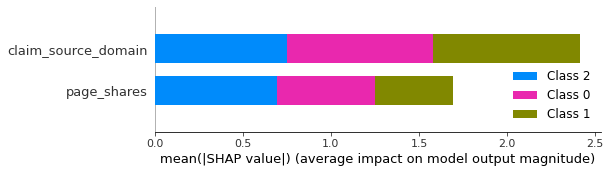

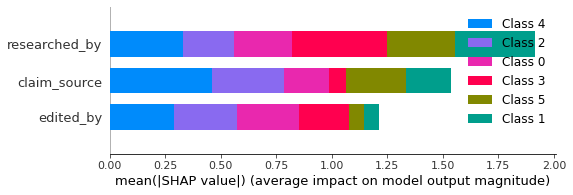

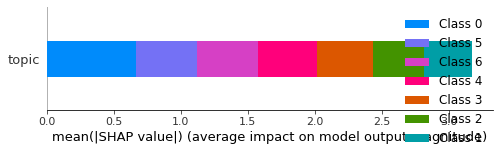

In [67]:
import shap
from catboost import Pool

shap.initjs()

for i in range (0,3):
    explainer = shap.TreeExplainer(classifiers[i])
    shap_values = explainer.shap_values(Pool(X_train[i], y_train[i], cat_features=range(0, len(X_train[i].columns))))
    shap.summary_plot(shap_values, X_train[i])


In [98]:
for i in range(0,3):
    print(classifiers[i].get_object_importance(Pool(X_train[i], cat_features=list(X_train[i]), label=X_train[i].values), Pool(X_test[i], cat_features=list(X_test[i]), label=X_test[i].values), type='PerObject'))

CatBoostError: catboost/private/libs/target/data_providers.cpp:517: Currently only multi-regression objectives work with multidimensional target